# 🏠 House Prices EDA 실습 (정답 포함)

이 노트북은 Kaggle House Prices 데이터셋(`House Prices - Advanced Regression Techniques.csv`)으로
탐색적 데이터 분석(EDA)을 단계별로 연습하기 위한 문제집입니다.

포함된 내용 (강의안 전체 흐름 반영):
1. 데이터 로드 & 구조 파악
2. 결측치 탐색
3. 수치형 변수 분석 (분포 / 히스토그램 / boxplot)
4. 범주형 변수 분석 (countplot / 평균 타깃 비교)
5. 타깃(SalePrice) 분포와 로그변환
6. 주요 변수 간 관계 시각화 (산점도, jointplot 스타일)
7. 상관관계 분석 & 히트맵
8. 이상값 확인
9. 변수 변환과 비교 (예: log 변환 후 상관 변화)
10. 인사이트 요약(서술형)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

df = pd.read_csv("./data/05_House Prices - Advanced Regression Techniques.csv")
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## 1️⃣ 데이터 구조 파악
- 데이터의 행/열 수(`shape`)를 확인하세요.
- `info()`로 각 컬럼의 자료형과 결측 여부를 확인하세요.
- `describe()`로 수치형 변수들의 기본 통계를 확인하세요.
- `SalePrice`의 기본 통계를 따로 출력하세요.

In [ ]:
print('데이터 크기:', df.shape)

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [5]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

## 2️⃣ 결측치 탐색
- 각 컬럼별 결측치 개수를 계산하고, 결측치가 있는 컬럼만 내림차순으로 정렬해서 상위 15개를 표시하세요.
- 결측치 비율(%)도 계산해서 같이 확인하세요.
- 결측치가 특히 많은 컬럼은 어떤 의미의 변수인지(예: 차고 없음 등) 주석으로 메모하세요.

In [7]:
na_count = df.isnull().sum()
na_count

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [8]:
na_ratio = (df.isnull().sum() / len(df) * 100)
na_ratio

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64

In [9]:
na_table = pd.concat([na_count, na_ratio], axis=1)
na_table

,0,1
Id,0,0.000000
MSSubClass,0,0.000000
MSZoning,0,0.000000
LotFrontage,259,17.739726
LotArea,0,0.000000
...,...,...
MoSold,0,0.000000
YrSold,0,0.000000
SaleType,0,0.000000
SaleCondition,0,0.000000


In [10]:
na_table.columns = ['missing_cnt','missing_%']
na_table

,missing_cnt,missing_%
Id,0,0.000000
MSSubClass,0,0.000000
MSZoning,0,0.000000
LotFrontage,259,17.739726
LotArea,0,0.000000
...,...,...
MoSold,0,0.000000
YrSold,0,0.000000
SaleType,0,0.000000
SaleCondition,0,0.000000


In [11]:
na_table = na_table[na_table['missing_cnt']>0].sort_values('missing_cnt', ascending=False)
na_table

,missing_cnt,missing_%
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
MasVnrType,872,59.726027
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945


In [12]:
na_table.head(15)

,missing_cnt,missing_%
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
MasVnrType,872,59.726027
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945


## 3️⃣ 타깃 변수(SalePrice) 분포
- `SalePrice`를 히스토그램과 KDE(밀도곡선)로 시각화하세요.
- 박스플롯(boxplot)으로도 시각화하여 이상치처럼 보이는 포인트가 있는지 확인하세요.
- 왜도가 있는지(skew) `df['SalePrice'].skew()`로 확인하세요.

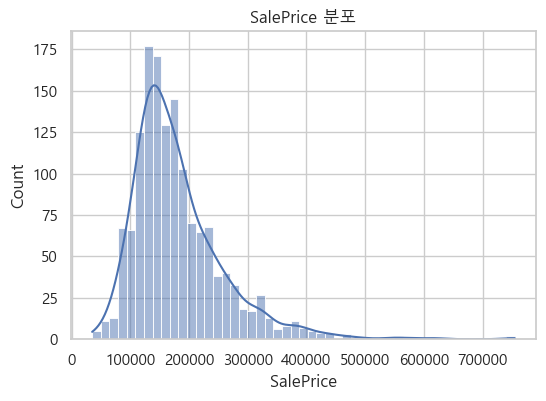

In [13]:
plt.figure(figsize=(6,4))
sns.histplot(df['SalePrice'], kde=True)
plt.title('SalePrice 분포')
plt.show()

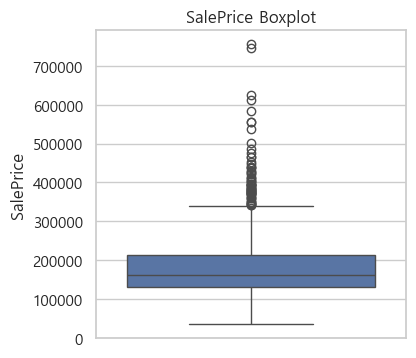

SalePrice skew: 1.8828757597682129


In [14]:
plt.figure(figsize=(4,4))
sns.boxplot(y=df['SalePrice'])
plt.title('SalePrice Boxplot')
plt.show()

print('SalePrice skew:', df['SalePrice'].skew())

## 4️⃣ 주요 수치형 변수들의 분포
- 아래 변수들에 대해 히스토그램 또는 distplot 스타일 시각화를 그리세요:
  - `GrLivArea` (지상 생활 면적)
  - `LotArea` (대지 면적)
  - `GarageArea` (차고 면적)
- 각 변수에 대해 `describe()`와 `skew()`도 같이 확인하세요.
- 오른쪽 꼬리가 긴(극단적으로 큰 값이 있는) 변수는 무엇인가요?

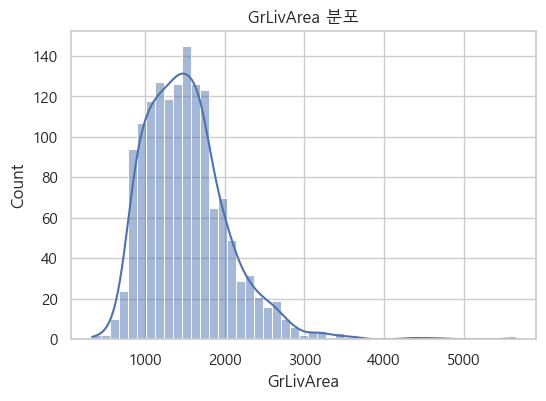

GrLivArea describe:
 count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64
GrLivArea skew: 1.3665603560164552
----------------------------------------


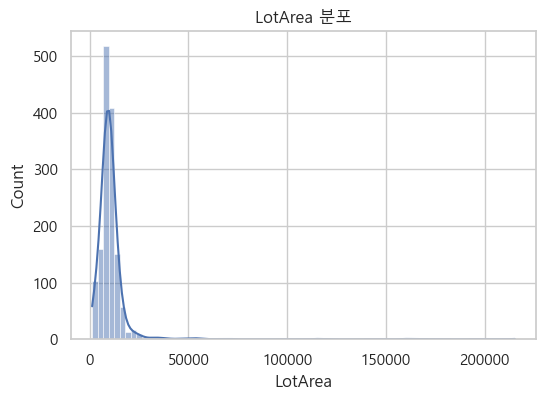

LotArea describe:
 count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64
LotArea skew: 12.207687851233496
----------------------------------------


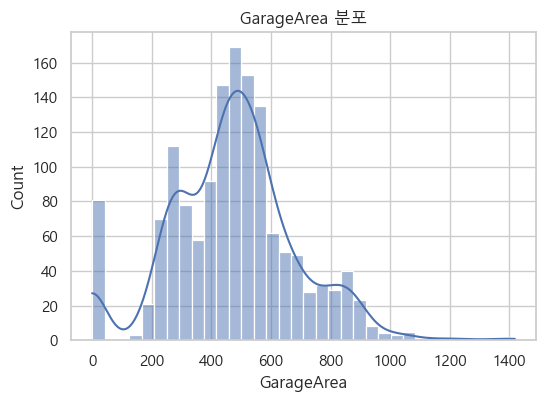

GarageArea describe:
 count    1460.000000
mean      472.980137
std       213.804841
min         0.000000
25%       334.500000
50%       480.000000
75%       576.000000
max      1418.000000
Name: GarageArea, dtype: float64
GarageArea skew: 0.17998090674623907
----------------------------------------


In [15]:
cols = ['GrLivArea','LotArea','GarageArea']
for c in cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[c], kde=True)
    plt.title(f'{c} 분포')
    plt.show()
    print(c, 'describe:\n', df[c].describe())
    print(c, 'skew:', df[c].skew())
    print('-'*40)
    

## 5️⃣ 범주형 변수 분석
- 다음 범주형 변수 중 하나를 선택하세요: `Neighborhood` (동네) 또는 `OverallQual` (전반적 품질 점수)
  (참고: OverallQual은 사실상 정수형 등급이지만, 품질 카테고리처럼 다뤄도 좋습니다.)
- 해당 변수별로 `SalePrice`의 평균을 계산한 뒤 내림차순으로 정렬해 상위 10개를 보여주세요.
- barplot으로 시각화하세요.
- 어떤 범주가 집값이 특히 높은지 해석을 적으세요.

In [17]:
cat_col = 'Neighborhood'  # 또는 'OverallQual'

grouped = df.groupby(cat_col)['SalePrice'].mean().sort_values(ascending=False)

print(grouped.head(10))

plt.figure(figsize=(10,4))

Neighborhood
NoRidge    335295.317073
NridgHt    316270.623377
StoneBr    310499.000000
Timber     242247.447368
Veenker    238772.727273
Somerst    225379.837209
ClearCr    212565.428571
Crawfor    210624.725490
CollgCr    197965.773333
Blmngtn    194870.882353
Name: SalePrice, dtype: float64


<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

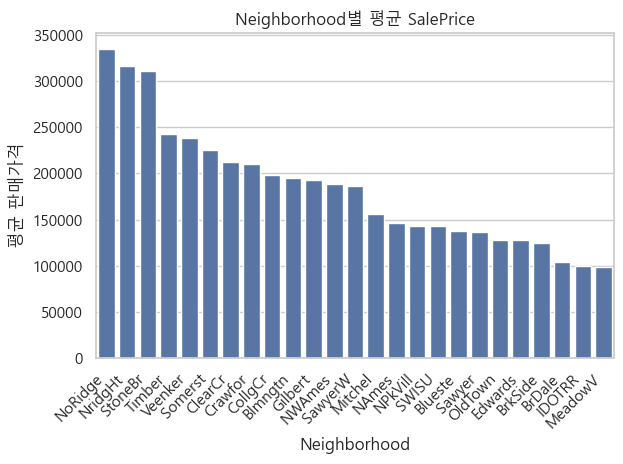

In [18]:
sns.barplot(x=grouped.index, y=grouped.values)

plt.xticks(rotation=45, ha='right')

plt.title(f'{cat_col}별 평균 SalePrice')

plt.ylabel('평균 판매가격')

plt.tight_layout()

plt.show()

## 6️⃣ 로그 변환으로 분포 안정화하기
- `SalePrice`에 로그 변환한 컬럼 `SalePrice_log = np.log1p(SalePrice)`를 만드세요. (`np.log1p`는 log(1+x))
- 원본 `SalePrice`와 `SalePrice_log`의 히스토그램을 나란히 비교해서 왜도(skew)가 줄어드는지 확인하세요.
- 두 변수의 skew 값을 각각 출력하세요.

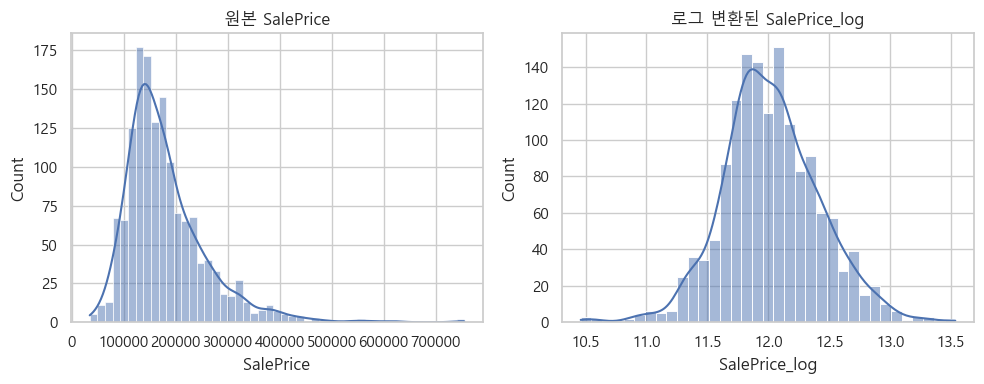

원본 skew: 1.8828757597682129
로그 skew: 0.12134661989685333


In [19]:
df['SalePrice_log'] = np.log1p(df['SalePrice'])

fig, axes = plt.subplots(1,2,figsize=(10,4))
sns.histplot(df['SalePrice'], kde=True, ax=axes[0])
axes[0].set_title('원본 SalePrice')
sns.histplot(df['SalePrice_log'], kde=True, ax=axes[1])
axes[1].set_title('로그 변환된 SalePrice_log')
plt.tight_layout()
plt.show()


print('원본 skew:', df['SalePrice'].skew())
print('로그 skew:', df['SalePrice_log'].skew())

## 7️⃣ 주요 변수와 SalePrice의 관계
- `GrLivArea`(지상 생활 면적) vs `SalePrice` 산점도를 그리세요.
- `TotalBsmtSF`(지하실 총 면적) vs `SalePrice`도 산점도로 그려보세요.
- 각각의 그래프에서 '면적이 클수록 비싸지는 경향'이 보이는지 설명하세요.
- 가능하다면 회귀선(추세선)을 추가해보세요 (`sns.regplot`).

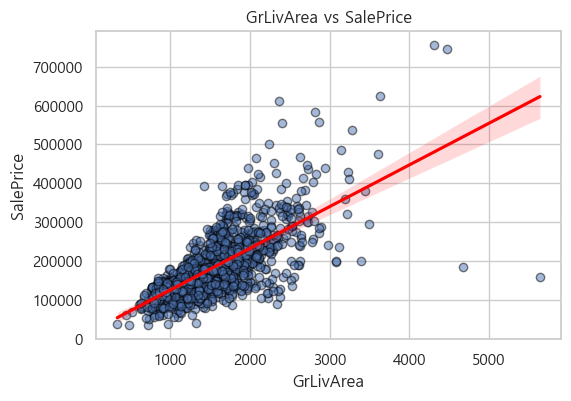

In [21]:
plt.figure(figsize=(6,4))

sns.regplot(x='GrLivArea', y='SalePrice', data=df,

            scatter_kws={'alpha':0.5,'edgecolor':'black'}, line_kws={'color':'red'})

plt.title('GrLivArea vs SalePrice')

plt.show()

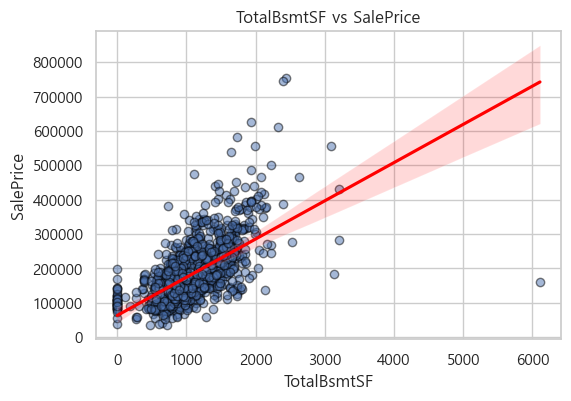

In [22]:
plt.figure(figsize=(6,4))

sns.regplot(x='TotalBsmtSF', y='SalePrice', data=df,

            scatter_kws={'alpha':0.5,'edgecolor':'black'}, line_kws={'color':'red'})

plt.title('TotalBsmtSF vs SalePrice')

plt.show()


## 8️⃣ 상관관계 분석
- 수치형 변수들 중 집값과 관련 있어 보이는 주요 변수만 뽑아 상관계수를 계산하세요.
  예: `SalePrice`, `GrLivArea`, `TotalBsmtSF`, `GarageArea`, `YearBuilt`, `OverallQual`
- 이들만 모은 DataFrame으로 상관행렬(corr())을 만들고 히트맵(heatmap)으로 시각화하세요.
- 어떤 변수가 SalePrice와 강하게(+ 또는 -) 상관되어 있는지 적으세요.

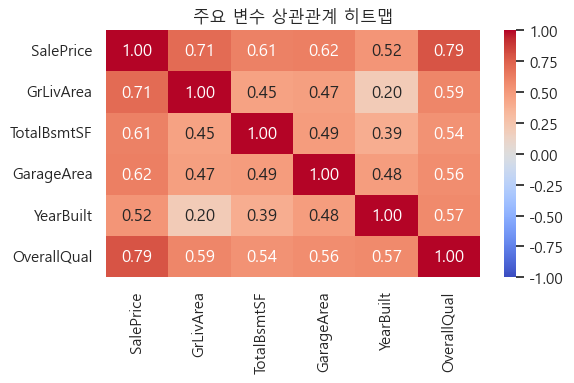

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageArea     0.623431
TotalBsmtSF    0.613581
YearBuilt      0.522897
Name: SalePrice, dtype: float64

In [23]:
cols_corr = ['SalePrice','GrLivArea','TotalBsmtSF','GarageArea','YearBuilt','OverallQual']

corr_mat = df[cols_corr].corr()

plt.figure(figsize=(6,4))

sns.heatmap(corr_mat, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)

plt.title('주요 변수 상관관계 히트맵')

plt.tight_layout()

plt.show()

corr_mat['SalePrice'].sort_values(ascending=False)



## 9️⃣ 이상값 관찰
- `GrLivArea`가 매우 큰데 `SalePrice`가 상대적으로 낮은 점, 또는 `SalePrice`가 극단적으로 높은 점 등을 찾아보세요.
- 이런 점들은 boxplot이나 산점도에서 무엇처럼 보였나요?
- 이 포인트들을 그대로 모델에 넣을지, 제거하거나 별도로 다룰지에 대한 의견을 적으세요.

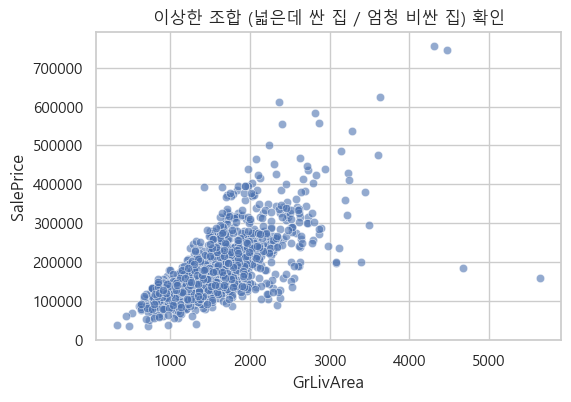

고가 상위 5건:
       SalePrice  GrLivArea  OverallQual Neighborhood
691      755000       4316           10      NoRidge
1182     745000       4476           10      NoRidge
1169     625000       3627           10      NoRidge
898      611657       2364            9      NridgHt
803      582933       2822            9      NridgHt

GrLivArea 상위 10건 (가격 비교):
       GrLivArea  SalePrice  OverallQual Neighborhood
1298       5642     160000           10      Edwards
523        4676     184750           10      Edwards
1182       4476     745000           10      NoRidge
691        4316     755000           10      NoRidge
1169       3627     625000           10      NoRidge
185        3608     475000           10      OldTown
304        3493     295000            7      OldTown
1268       3447     381000            8      Crawfor
635        3395     200000            6        SWISU
769        3279     538000            8      StoneBr


In [24]:
plt.figure(figsize=(6,4))

sns.scatterplot(x='GrLivArea', y='SalePrice', data=df, alpha=0.6)

plt.title('이상한 조합 (넓은데 싼 집 / 엄청 비싼 집) 확인')

plt.show()

saleprice_hi = df.nlargest(5, 'SalePrice')[['SalePrice','GrLivArea','OverallQual','Neighborhood']]

print('고가 상위 5건:\n', saleprice_hi)

area_hi_lowprice = df.sort_values('GrLivArea', ascending=False).head(10)[['GrLivArea','SalePrice','OverallQual','Neighborhood']]

print('\nGrLivArea 상위 10건 (가격 비교):\n', area_hi_lowprice)



## 🔟 최종 인사이트 요약 (서술형)
아래 질문에 대해 짧게 정리하세요.
1. 집값(SalePrice)에 가장 영향을 많이 주는 것처럼 보이는 상위 요인은 무엇인가요?
   (예: 주거면적, 전반적 품질 등)
2. 어떤 변수들은 로그 변환 등 분포 안정화가 필요해 보였나요?
3. 어떤 이상치(초고가 주택, 엄청 큰 면적 등)를 처리하거나 따로 분리 관리해야 할까요?
4. 모델링(가격 예측)으로 넘어갈 때, 어떤 전처리(스케일링/로그변환/이상치 제거)를 우선 적용하고 싶나요?

### 예시 해설 아이디어
- `OverallQual`, `GrLivArea`, `TotalBsmtSF` 등은 `SalePrice`와 강한 양의 상관을 갖는다.
- `SalePrice`는 오른쪽 꼬리가 길고 skew가 크기 때문에 로그 변환하면 더 정규에 가까워진다.
- `GrLivArea`가 매우 크지만 `SalePrice`가 낮은 집 등은 특수 거래거나 데이터 입력 이슈 가능성이 있다. 이들은 모델 학습 전에 제거(drop)하거나 별도 세그먼트로 다루는 게 좋다.
- 실제 회귀 모델을 학습할 땐, `SalePrice`를 로그 변환하고, 면적 관련 변수들에서 극단값을 클리핑/제거한 데이터를 쓰는 전략이 흔하다.
